In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AW_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,NaN,0.63,0.00,NaN,0.63,NaN,0.63,...,0.0,0.0,0.135,NaN,0.135,NaN,0.000,3.537,NaN,191.0
3,0.00,0.00,0.00,0.0,NaN,NaN,0.00,1.85,NaN,0.00,...,0.0,NaN,NaN,0.0,0.000,NaN,0.000,NaN,15.0,NaN
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.0,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,NaN,0.00,0.0,NaN,NaN,0.00,0.00,0.0,0.00,...,0.0,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.0,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	203
float64		column 2	62
float64		column 3	232
float64		column 4	145
float64		column 5	207
float64		column 6	236
float64		column 7	261
float64		column 8	290
float64		column 9	522
float64		column 10	232
float64		column 11	584
float64		column 12	116
float64		column 13	174
float64		column 14	377
float64		column 15	729
float64		column 16	526
float64		column 17	381
float64		column 18	352
float64		column 19	145
float64		column 20	435
float64		column 21	555
float64		column 22	145
float64		column 23	584
float64		column 24	555
float64		column 25	609
float64		column 26	700
float64		column 27	29
float64		column 28	555
float64		column 29	642
float64		column 30	841
float64		column 31	816
float64		column 32	845
float64		column 33	87
float64		column 34	932
float64		column 35	758
float64		column 36	903
float64		column 37	493
float64		column 38	319
float64		column 39	439
float64		column 40	874
float64		column 41	290
float64		column 42	551
float64	

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4394.000000,4535.000000,4365.000000,4452.000000,4390.000000,4361.000000,4336.000000,4307.000000,4075.000000,4365.000000,...,4365.000000,3984.000000,3926.000000,4129.000000,4133.000000,3901.000000,3984.000000,3868.000000,4100.000000,3843.000000
mean,0.105457,0.214836,0.280385,0.067451,0.314296,0.095430,0.115717,0.106476,0.090984,0.239840,...,0.031723,0.036741,0.137001,0.016972,0.273630,0.076691,0.042306,4.863858,49.401707,279.938850
std,0.308010,1.298860,0.505834,1.418243,0.671432,0.275086,0.397294,0.407194,0.280058,0.648257,...,0.290516,0.223624,0.229771,0.111962,0.844452,0.249512,0.428963,31.039786,127.997712,605.379619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,6.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.283500,14.000000,96.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.187750,0.000000,0.315000,0.054000,0.000000,3.697000,43.000000,260.500000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,1102.500000,2204.000000,15841.000000


<AxesSubplot:>

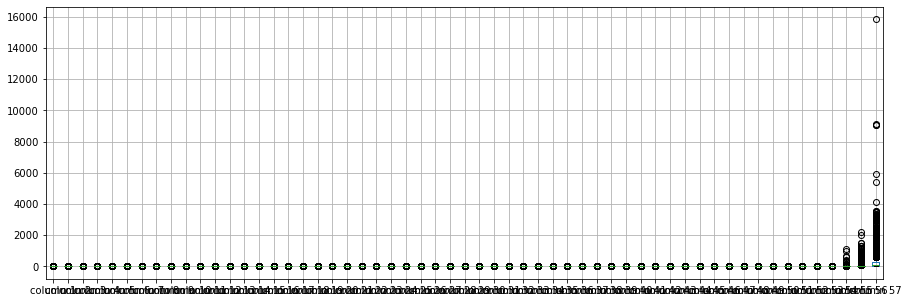

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.105457
column 2       0.214836
column 3       0.280385
column 4       0.067451
column 5       0.314296
column 6       0.095430
column 7       0.115717
column 8       0.106476
column 9       0.090984
column 10      0.239840
column 11      0.061642
column 12      0.540172
column 13      0.095829
column 14      0.058126
column 15      0.047169
column 16      0.249462
column 17      0.143672
column 18      0.189439
column 19      1.677496
column 20      0.087499
column 21      0.804552
column 22      0.121301
column 23      0.101550
column 24      0.097194
column 25      0.552390
column 26      0.271724
column 27      0.767629
column 28      0.127781
column 29      0.094867
column 30      0.103035
column 31      0.067971
column 32      0.049051
column 33      0.096333
column 34      0.050985
column 35      0.109396
column 36      0.098860
column 37      0.138338
column 38      0.012118
column 39      0.078355
column 40      0.066250
column 41      0.039180
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.017034,0.062071,0.014679,0.022760,0.060523,0.008207,-0.003673,0.112987,0.035607,...,-0.016282,-0.025713,-0.025018,-0.032100,0.050790,0.119852,-0.006559,0.039424,0.097594,0.098620
column 2,-0.017034,1.000000,-0.032826,-0.007031,-0.023550,-0.023223,0.002553,-0.016573,0.000244,0.033711,...,-0.015163,-0.009970,-0.056488,-0.017892,-0.015394,-0.006842,0.005250,0.003355,0.006172,-0.017282
column 3,0.062071,-0.032826,1.000000,-0.021397,0.074510,0.084544,0.033036,0.006986,0.084686,0.023427,...,-0.025251,-0.034874,-0.014807,-0.034788,0.098610,0.097419,0.002895,0.082101,0.155141,0.072571
column 4,0.014679,-0.007031,-0.021397,1.000000,0.003104,-0.010299,0.021030,0.008695,-0.001459,-0.006544,...,-0.001390,0.001938,-0.018915,-0.007309,-0.002075,0.013137,0.000688,0.005820,0.036836,0.024405
column 5,0.022760,-0.023550,0.074510,0.003104,1.000000,0.048979,0.138086,0.028233,0.019418,0.032400,...,-0.031179,-0.032467,-0.050779,-0.027823,0.021027,0.040436,0.006849,0.044690,0.076168,-0.006204
column 6,0.060523,-0.023223,0.084544,-0.010299,0.048979,1.000000,0.054727,0.080399,0.114593,0.010647,...,-0.030022,-0.015469,0.003674,-0.016390,0.066501,0.118972,0.026894,-0.008237,0.126860,0.082321
column 7,0.008207,0.002553,0.033036,0.021030,0.138086,0.054727,1.000000,0.054338,0.051605,0.065442,...,-0.030280,-0.034062,-0.060823,-0.028031,0.050686,0.063796,0.048180,0.047116,0.083516,-0.011937
column 8,-0.003673,-0.016573,0.006986,0.008695,0.028233,0.080399,0.054338,1.000000,0.093287,0.087756,...,-0.020500,-0.030548,-0.035554,-0.019539,0.033047,0.058772,-0.010962,0.015205,0.059518,0.049085
column 9,0.112987,0.000244,0.084686,-0.001459,0.019418,0.114593,0.051605,0.093287,1.000000,0.148293,...,-0.023395,-0.015628,-0.032124,0.009145,0.035766,0.145055,-0.000155,0.112458,0.291964,0.253534
column 10,0.035607,0.033711,0.023427,-0.006544,0.032400,0.010647,0.065442,0.087756,0.148293,1.000000,...,-0.015660,0.012556,0.004149,0.008627,0.035885,0.087437,0.028034,0.067386,0.166530,0.103137


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+78,17+78+78,17+78+78+78,17+78+78,17+78,17], vae_layer = False, seed = 780)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 552.5925064086914
Epoch: 1 , loss: 557.1410593969897
Epoch: 2 , loss: 558.6939720924723
Epoch: 3 , loss: 553.1907312479584
Epoch: 4 , loss: 549.6864061521736
Epoch: 5 , loss: 555.1549974767173
Epoch: 6 , loss: 550.4639067699685
Epoch: 7 , loss: 550.6272101319211
Epoch: 8 , loss: 557.5019081195472
Epoch: 9 , loss: 548.4435757892887
Epoch: 10 , loss: 518.9579164192652
Epoch: 11 , loss: 461.2722465435387
Epoch: 12 , loss: 425.71461702140783
Epoch: 13 , loss: 414.8807839848854
Epoch: 14 , loss: 394.0317141968199
Epoch: 15 , loss: 390.7146869619549
Epoch: 16 , loss: 381.49903872287234
Epoch: 17 , loss: 374.1425353259575
Epoch: 18 , loss: 372.11718008327153
Epoch: 19 , loss: 372.45832784832146
Epoch: 20 , loss: 370.69324308654575
Epoch: 21 , loss: 361.4163601705837
Epoch: 22 , loss: 369.3502587507826
Epoch: 23 , loss: 352.6309030778732
Epoch: 24 , loss: 361.4867961099339
Epoch: 25 , loss: 368.5268246853393
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,-0.021411,0.000000,0.000000,-0.197818,0.0,-0.267324,0.0,...,0.0,0.000000,0.000000,0.013587,0.0,0.052656,0.000000,0.000000,-33.533278,0.000000
3,0.0,0.000000,0.0,0.000000,-1.616063,0.115555,0.000000,0.0,0.081069,0.0,...,0.0,-0.096213,0.000716,0.000000,0.0,0.113552,0.000000,-1.664059,0.000000,35.065987
4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4593,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4594,0.0,-0.013223,0.0,0.000000,0.266273,0.079545,0.000000,0.0,0.000000,0.0,...,0.0,-0.058245,0.055484,0.007763,0.0,0.000000,-0.397237,-0.163790,-4.740631,0.000000
4595,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

20136.580985457338

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.4242973497735546

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.640000,0.64,0.000000,0.320000,0.000000,0.000000,0.00,0.000000,0.00,...,0.0,0.000000,0.000000,0.000000,0.778,0.000000,0.000000,3.756000,61.000000,278.000000
1,0.21,0.280000,0.50,0.000000,0.140000,0.280000,0.210000,0.07,0.000000,0.94,...,0.0,0.000000,0.132000,0.000000,0.372,0.180000,0.048000,5.114000,101.000000,1028.000000
2,0.00,0.000000,0.00,-0.021411,0.630000,0.000000,0.112182,0.63,0.042676,0.63,...,0.0,0.000000,0.135000,0.013587,0.135,0.052656,0.000000,3.537000,6.466722,191.000000
3,0.00,0.000000,0.00,0.000000,0.233937,0.115555,0.000000,1.85,0.081069,0.00,...,0.0,-0.096213,0.223716,0.000000,0.000,0.113552,0.000000,1.335941,15.000000,89.065987
4,0.00,0.000000,0.00,0.000000,1.920000,0.000000,0.000000,0.00,0.000000,0.64,...,0.0,0.000000,0.054000,0.000000,0.164,0.054000,0.000000,1.671000,4.000000,112.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.000000,0.64,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,...,0.0,0.000000,0.348000,0.000000,1.160,0.000000,0.000000,3.121000,15.000000,103.000000
4593,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,...,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,3.043000,15.000000,70.000000
4594,0.00,-0.013223,0.00,0.000000,0.266273,0.079545,0.000000,0.00,0.000000,0.00,...,0.0,-0.058245,0.191484,0.007763,0.000,0.000000,0.011763,1.673210,7.259369,68.000000
4595,0.17,0.000000,0.68,0.000000,0.340000,0.340000,0.000000,0.00,0.000000,0.00,...,0.0,0.000000,0.032000,0.000000,0.065,0.000000,0.000000,1.189000,5.000000,69.000000


In [21]:
imputations[-1].to_excel("Spam_AW_1(imp).xlsx", index=False, header=False)